<a href="https://colab.research.google.com/github/arofenitra/Scientific-Computing/blob/main/image_processing/anisotropic_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Definition

Formally, let ${\displaystyle \Omega \subset \mathbb {R} ^{2}}$ denote a subset of the plane and ${\displaystyle I(\cdot ,t):\Omega \rightarrow \mathbb {R} }$ be a family of gray scale images.
 ${\displaystyle I(\cdot ,0)}$ is the input image. Then anisotropic diffusion is defined as
$$
 {\displaystyle {\frac {\partial I}{\partial t}}=\operatorname {div} \left(c\left(\|\nabla I\|\right)\nabla I\right)=\nabla c\cdot \nabla I+c\left(\|\nabla I\|\right)\,\Delta I}$$
 Where ${\displaystyle c\left(\|\nabla I\|\right)}$ is the diffusion coefficient.
 Some research (Perona and Malik) proposed diffusion coefficient as :
$$ {\displaystyle c\left(\|\nabla I\|\right)=e^{-\left(\|\nabla I\|/K\right)^{2}}}$$
and
$${\displaystyle c\left(\|\nabla I\|\right)={\frac {1}{1+\left({\frac {\|\nabla I\|}{K}}\right)^{2}}}}$$
the constant K controls the sensitivity to edges and is usually chosen experimentally or as a function of the noise in the image.


### Edge enhancement
We want to find $c\left(\|\nabla I\|\right)$ such that the sharp boundaries is maintained.
- **case of one dimension**:

$$
 {\displaystyle {\frac {\partial I}{\partial t}}=\operatorname {div} \left(c\left(\|\nabla I\|\right)\nabla I\right)=\nabla c\cdot \nabla I+c\left(\|\nabla I\|\right)\,\Delta I}$$


 $$\frac{∂I}{∂t}=\frac{∂c}{∂x}\frac{∂I}{∂x}+c\frac{∂^2I}{∂x^2}$$
 Consider $ϕ(∂_xI)=c(|∂_xI|)∂_xI$ and we assume that $c>0$. We have
 $$∂_t(∂_xI)=∂_x(∂_tI)=∂_x(∂_x(c∂_xI))=∂_{xx}ϕ(∂_xI)=ϕ^{"}(∂_xI)∂_{xx}^2I+ϕ^{'}(∂_xI)∂_{xxx}I$$
 For some edge that have orientation (and $∂_xI>0$), $∂_{xx}I=0$ and $∂_{xxx}I<0$ at the point of inflexion, so that
t the slope of the edge will increase for $φ'(∂_xI) < 0$ and decrease for $φ'(∂_xI) > 0$. So at some $τ :∂xu<τ$ we will have edge blurring and edge sharpening will occur otherwise.
- **case of 2 dimension**:
We have from the above reasoning, at some $τ$ :
$$\begin{cases}\phi'(|∇I|)>0 & |\nabla I|<τ \\\phi'(|∇I|)<0 & \text{otherwise} \end{cases}$$
We can choose one of the following that satisfy the above :
$$ {\displaystyle c\left(\|\nabla I\|\right)=e^{-\left(\|\nabla I\|/K\right)^{2}}}$$
and
$${\displaystyle c\left(\|\nabla I\|\right)={\frac {1}{1+\left({\frac {\|\nabla I\|}{K}}\right)^{2}}}}$$

### Finite Difference Methods
We can use forward backward and central difference, method to simulate is numerically. The example of forward one is listed bellow.

$$\frac{∂}{∂t}I(x_i,y_j,t_k)≈\frac{1}{Δt}(I(x_i,y_j,t_{k+1})-I(x_i,y_j,t_{k})$$
$$\frac{∂}{∂x}I(x_i,y_j,t_k)≈\frac{1}{Δx}(I(x_{i+1},y_j,t_{k})-I(x_i,y_j,t_{k})$$
$$\frac{∂}{∂y}I(x_i,y_j,t_k)≈\frac{1}{Δy}(I(x_{i},y_{j+1},t_{k})-I(x_i,y_j,t_{k})$$
$$\frac{∂^2}{∂x^2}I(x_i,y_j,t_k)≈\frac{1}{Δx^2}(I(x_{i+1},y_j,t_{k})-2I(x_i,y_j,t_{k})+I(x_{i-1},y_j,t_k)$$
$$\frac{∂^2}{∂y^2}I(x_i,y_j,t_k)≈\frac{1}{Δx^2}(I(x_{i},y_{j+1},t_{k})-2I(x_i,y_j,t_{k})+I(x_{i},y_{j-1},t_k)$$
We can have the folowing
$$c(|∇I|^2)∇I=c\cdot \left[\frac{∂I}{∂x},\frac{∂I}{∂y}\right]^T$$
$$≈c(|∇I_{i,j}|^2)\left[\frac{1}{Δx}(I_{i+0.5,j}-I_{i-0.5,j})\; , \;  \frac{1}{Δy}(I_{i,j+0.5}-I_{i,j-0.5})\right]^T$$
Hence :
$$div(c(|∇I|^2)∇I)=\left[\frac{∂}{∂x}, \frac{∂}{∂y}\right]\cdot \left(c(|∇I|^2)∇I \right)$$
$$≈\frac{∂}{∂y}\left[c(|∇I_{i,j}|^2)\frac{1}{Δy}(I_{i,j+0.5}-I_{i,j-0.5}) \right]+\frac{∂}{∂x}\left[c(|∇I_{i,j}|^2)\frac{1}{Δx}(I_{i+0.5,j}-I_{i-0.5,j}) \right]$$
$$≈\frac{1}{\Delta y}\left[c(|∇I_{i,j+0.5}|^2)\frac{1}{Δy}(I_{i,j+1}-I_{i,j})-c(|∇I_{i,j-0.5}|^2)\frac{1}{Δy}(I_{i,j}-I_{i,j-1}) \right]+
\frac{1}{\Delta x}\left[c(|∇I_{i+0.5,j}|^2)\frac{1}{Δx}(I_{i+1,j}-I_{i,j})-c(|∇I_{i-0.5,j}|^2)\frac{1}{Δx}(I_{i,j}-I_{i-1,j}) \right]$$
We can take average so that
$$c(|∇I_{i+0.5,j}|^2)≈\frac{1}{2}\left( c(|∇I_{i+1,j}|^2)+c(|∇I_{i,j}|^2)\right)$$
$$c(|∇I_{i-0.5,j}|^2)≈\frac{1}{2}\left( c(|∇I_{i,j}|^2)+c(|∇I_{i-1,j}|^2)\right)$$
$$c(|∇I_{i,j+0.5}|^2)≈\frac{1}{2}\left( c(|∇I_{i,j+1}|^2)+c(|∇I_{i,j}|^2)\right)$$
$$c(|∇I_{i,j-0.5}|^2)≈\frac{1}{2}\left( c(|∇I_{i,j}|^2)+c(|∇I_{i,j-1}|^2)\right)$$
For the uniform grid, $Δx=Δy=1$, we can have the implicit $I_{i,j,k}=I(x_i,y_j,t_k)$:

$$I_{i,j,k+1}=I_{i,j,k}+\frac{Δt}{2\Delta y^2}\left[\left( c(|∇I_{i,j+1}|^2)+c(|∇I_{i,j}|^2)\right)(I_{i,j+1}-I_{i,j})-\left( c(|∇I_{i,j}|^2)+c(|∇I_{i,j-1}|^2)\right)(I_{i,j}-I_{i,j-1}) \right]+
\frac{Δt}{2\Delta x^2}\left[\left( c(|∇I_{i+1,j}|^2)+c(|∇I_{i,j}|^2)\right)(I_{i+1,j}-I_{i,j})-\left( c(|∇I_{i,j}|^2)+c(|∇I_{i-1,j}|^2)\right)(I_{i,j}-I_{i-1,j}) \right]$$
Where using central difference : $$ΔI_{i,j}=\left[\frac{1}{2\Delta x}\left(I_{i+1}-I_{i-1} \right),\left(I_{j+1}-I_{j-1} \right) \frac{1}{2\Delta y}\right]^T$$
$$|ΔI_{i,j}|^2=\frac{1}{4\Delta x^2}\left(I_{i+1}-I_{i-1} \right)^2+\left(I_{j+1}-I_{j-1} \right)^2 \frac{1}{4\Delta y^2}$$

### Another approach
Perona Malik is an ill problem, we can introduce kernel (gaussian kernel for example) to reduce the illness. So in that case, instead of $c(|∇I|^2)$, we will use $c(|∇(G*I)|^2)=c(|∇\tilde{I}|^2)$ for gaussian kernel $G_σ(x)=Cσ^{-0.5}\exp(-\frac{|x|}{4σ})$

[1 2 3 3]


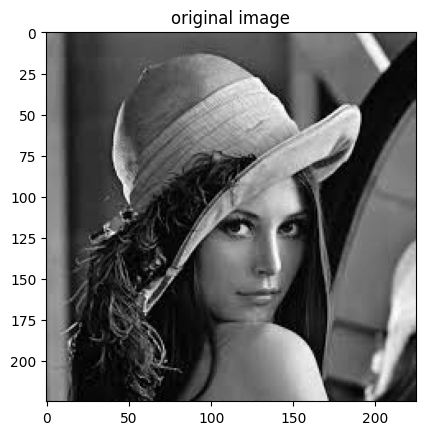

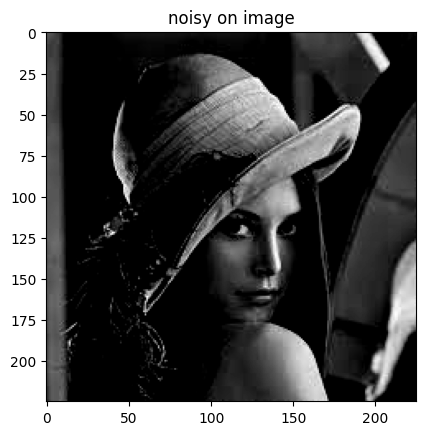

In [144]:
original_img=cv2.imread("lena_grey.jpeg",cv2.IMREAD_GRAYSCALE)
original_img=original_img.astype(float)
plt.imshow(original_img)
plt.title("original image")
plt.show()
noisy_img=white_noise("lena_grey.jpeg",0,0.25)

plt.imshow(noisy_img)
plt.title("noisy on image")
plt.show()

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.filters as flt
from scipy.ndimage import gaussian_filter
import scipy as sp
import warnings
import cv2
from skimage.util import random_noise
from numba import njit
import pylab as pl
#add noise to an image :
@njit
def add_noise(img,mean,std_dev):
    img=cv2.imread(img,cv2.IMREAD_GRAYSCALE)
    img=img.astype(float)
    noisy_img=random_noise(img,var=std_dev**2)
    return noisy_img


def anisodiff(img, niter=1, kappa=50, gamma=0.1, step=(1.,1.), sigma=0, option=1, ploton=False):
    """
    Anisotropic diffusion.

    Usage:
    imgout = anisodiff(im, niter, kappa, gamma, option)

    Arguments:
            img    - input image
            niter  - number of iterations
            kappa  - conduction coefficient 20-100 ?
            gamma  - max value of .25 for stability
            step   - tuple, the distance between adjacent pixels in (y,x)
            option - 1 Perona Malik diffusion equation No 1
                     2 Perona Malik diffusion equation No 2
            ploton - if True, the image will be plotted on every iteration

    Returns:
            imgout   - diffused image.
    """

    # initialize output array
    img = img.astype('float32')
    imgout = img.copy()

    # initialize some internal variables
    deltaS = np.zeros_like(imgout)
    deltaE = deltaS.copy()
    NS = deltaS.copy()
    EW = deltaS.copy()
    gS = np.ones_like(imgout)
    gE = gS.copy()

    # create the plot figure, if requested
    '''
    if ploton:


        fig = pl.figure(figsize=(20,5.5), num="Anisotropic diffusion")
        ax1, ax2 = fig.add_subplot(1,2,1), fig.add_subplot(1,2,2)

        ax1.imshow(img, interpolation='nearest')
        ih = ax2.imshow(imgout, interpolation='nearest', animated=True)
        ax1.set_title("Original image")
        ax2.set_title("Iteration 0")

        fig.canvas.draw()
    '''
    #niter is the iteration in time
    for ii in np.arange(1, niter):

        # calculate the diffs, this is the small difference in the grid
        deltaS[:-1,: ] = np.diff(imgout, axis=0)
        deltaE[: ,:-1] = np.diff(imgout, axis=1)

        if 0 < sigma:
            #This is the gaussian filter of the difference
            deltaSf = sp.ndimage.gaussian_filter(deltaS, sigma)
            deltaEf = sp.ndimage.gaussian_filter(deltaE, sigma)
        else:
            deltaSf = deltaS
            deltaEf = deltaE

        # conduction gradients (only need to compute one per dim!)
        if option == 1:
            #this is the diffusion coefficient for gaussian distribution
            gS = np.exp(-(deltaSf/kappa)**2.)/step[0]
            gE = np.exp(-(deltaEf/kappa)**2.)/step[1]
        elif option == 2:
            #this is the diffusion coefficient for cauchy distribution
            gS = 1./(1.+(deltaSf/kappa)**2.)/step[0]
            gE = 1./(1.+(deltaEf/kappa)**2.)/step[1]

        # update matrices
        E = gE * deltaE
        S = gS * deltaS

        # subtract a copy that has been shifted 'North/West' by one
        NS[:] = S
        EW[:] = E
        NS[1:,:] -= S[:-1,:]
        EW[:,1:] -= E[:,:-1]

        # update the image, image I_i,j,k}
        imgout += gamma * (NS + EW)

        if ploton:
            iterstring = "Iteration %i" % (ii + 1)
            ih.set_data(imgout)
            ax2.set_title(iterstring)
            fig.canvas.draw()

    return imgout



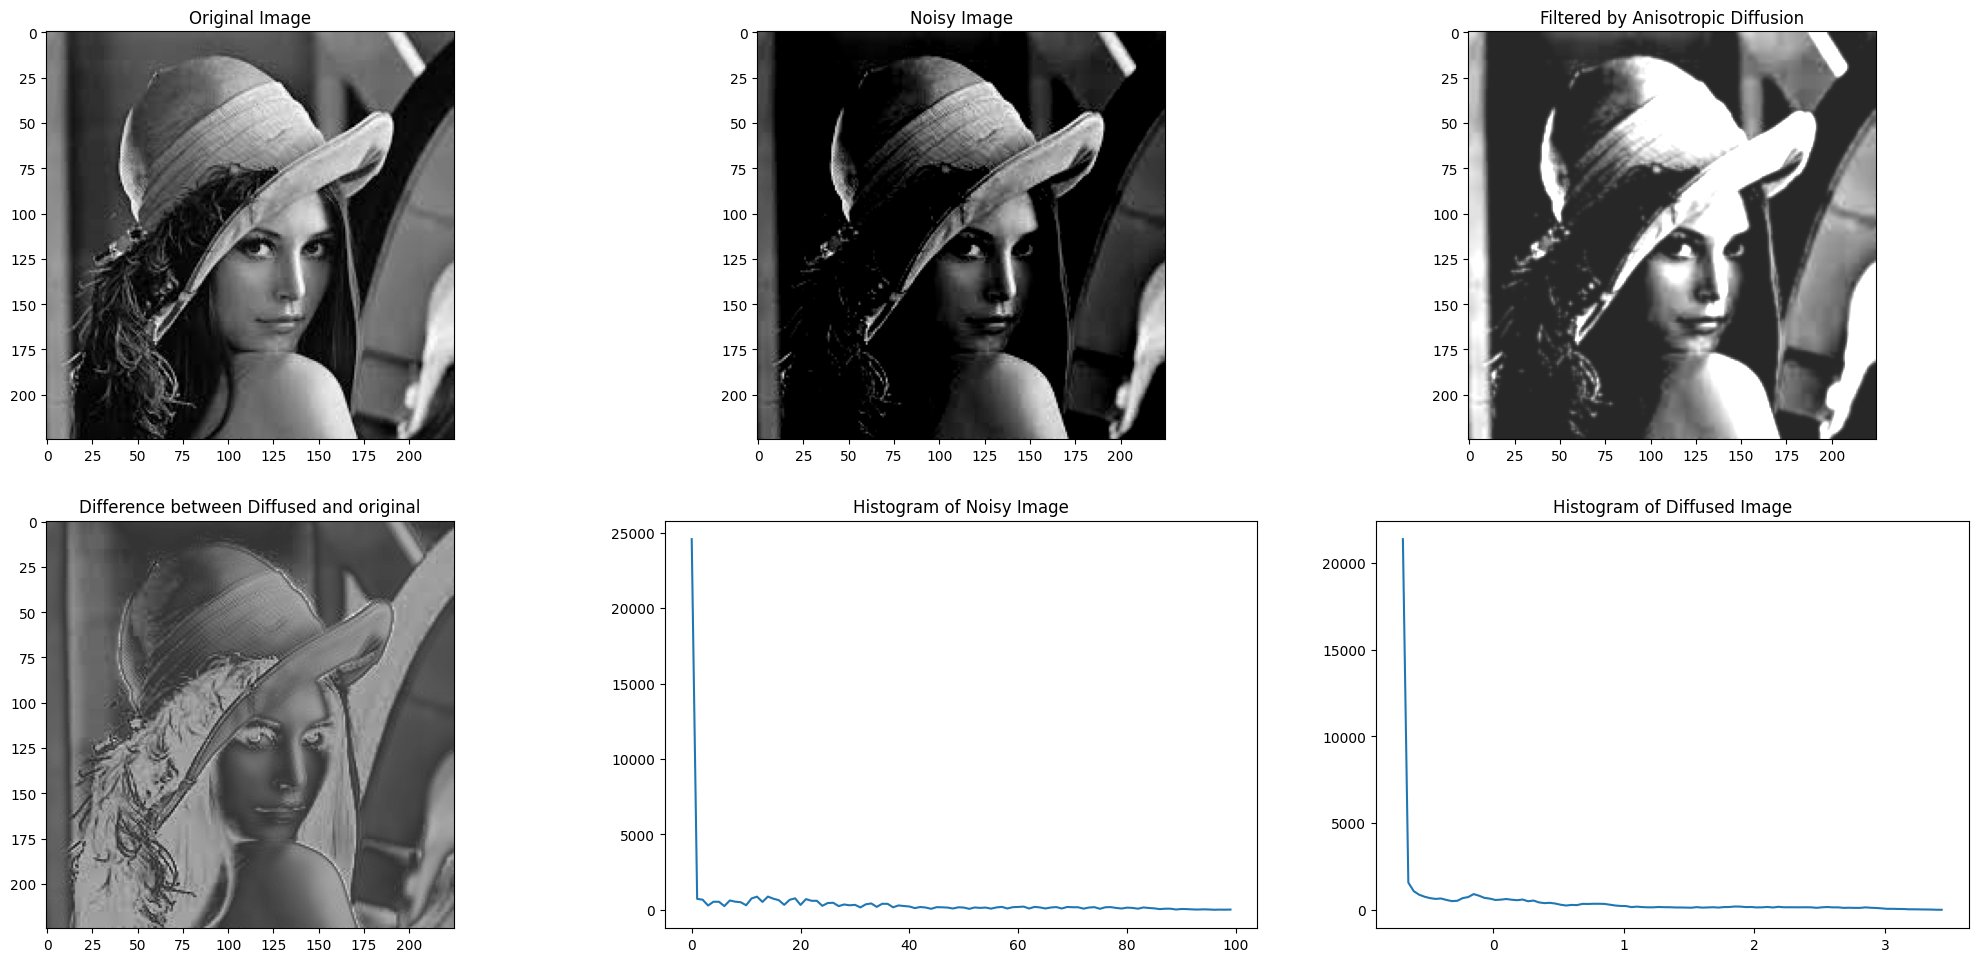

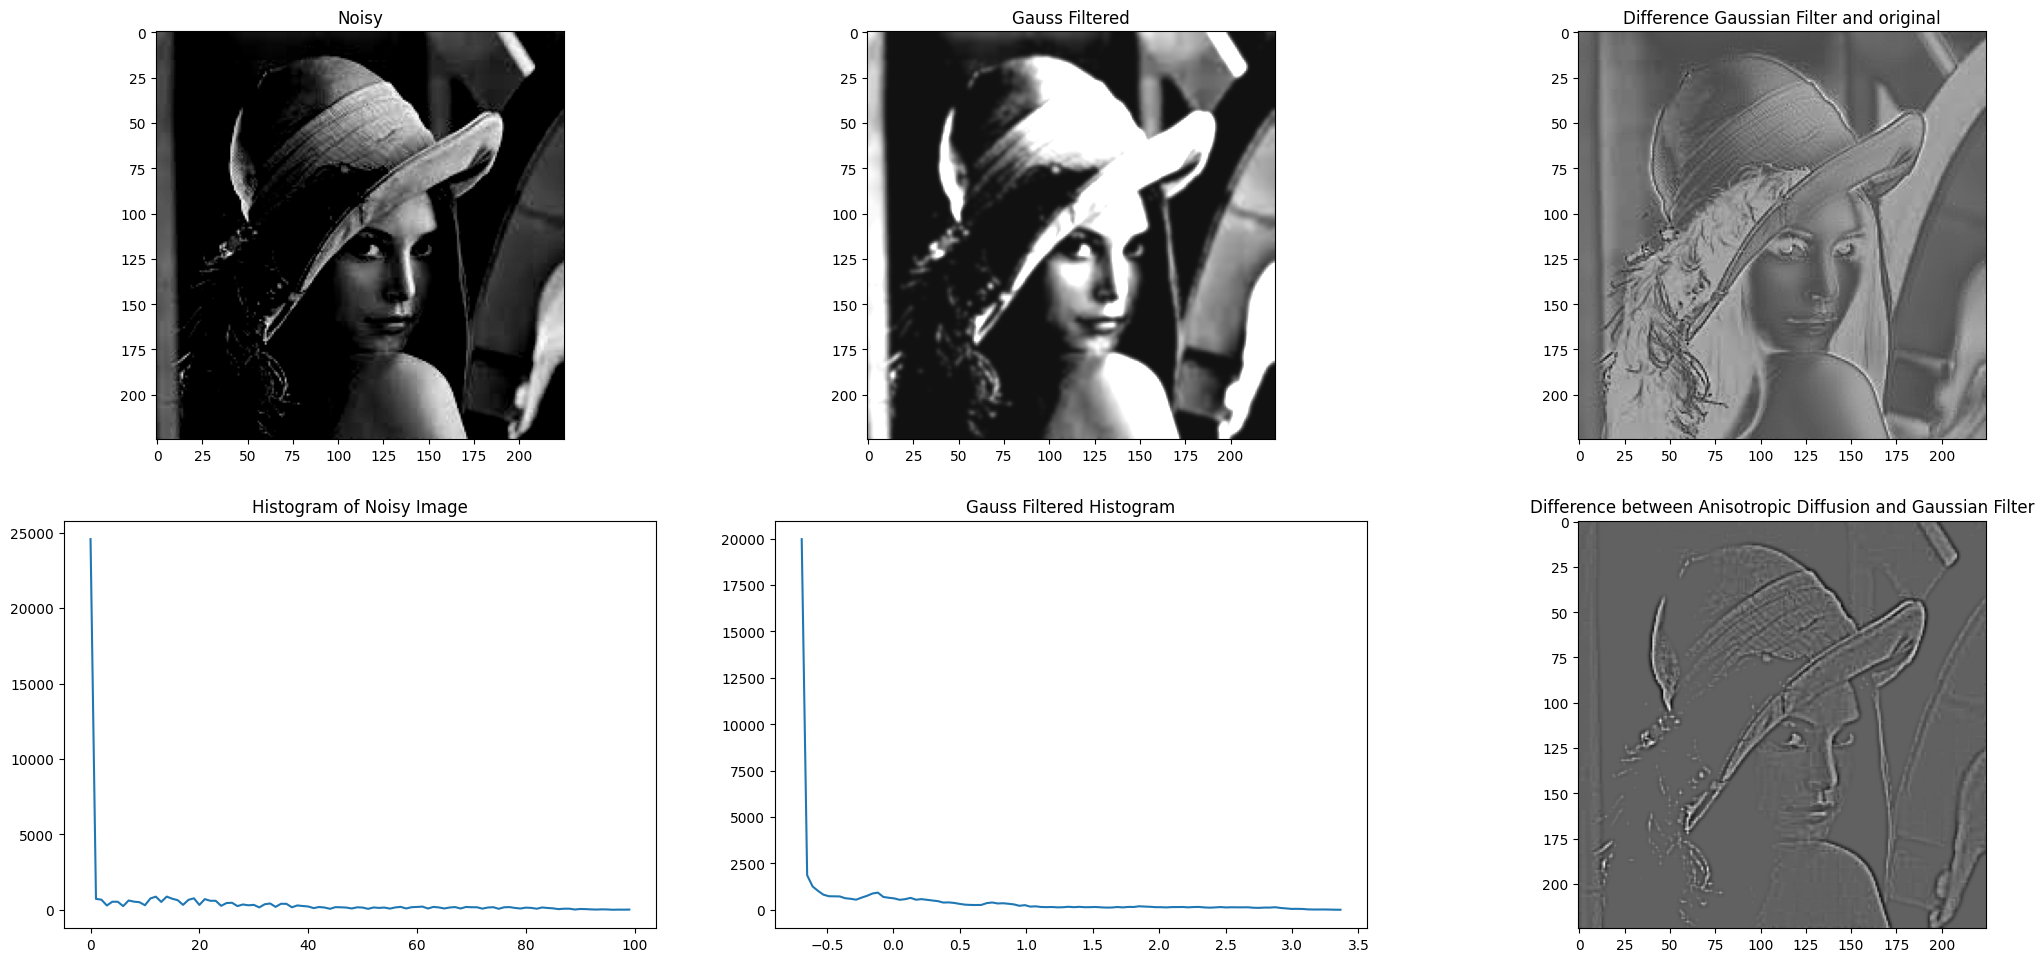

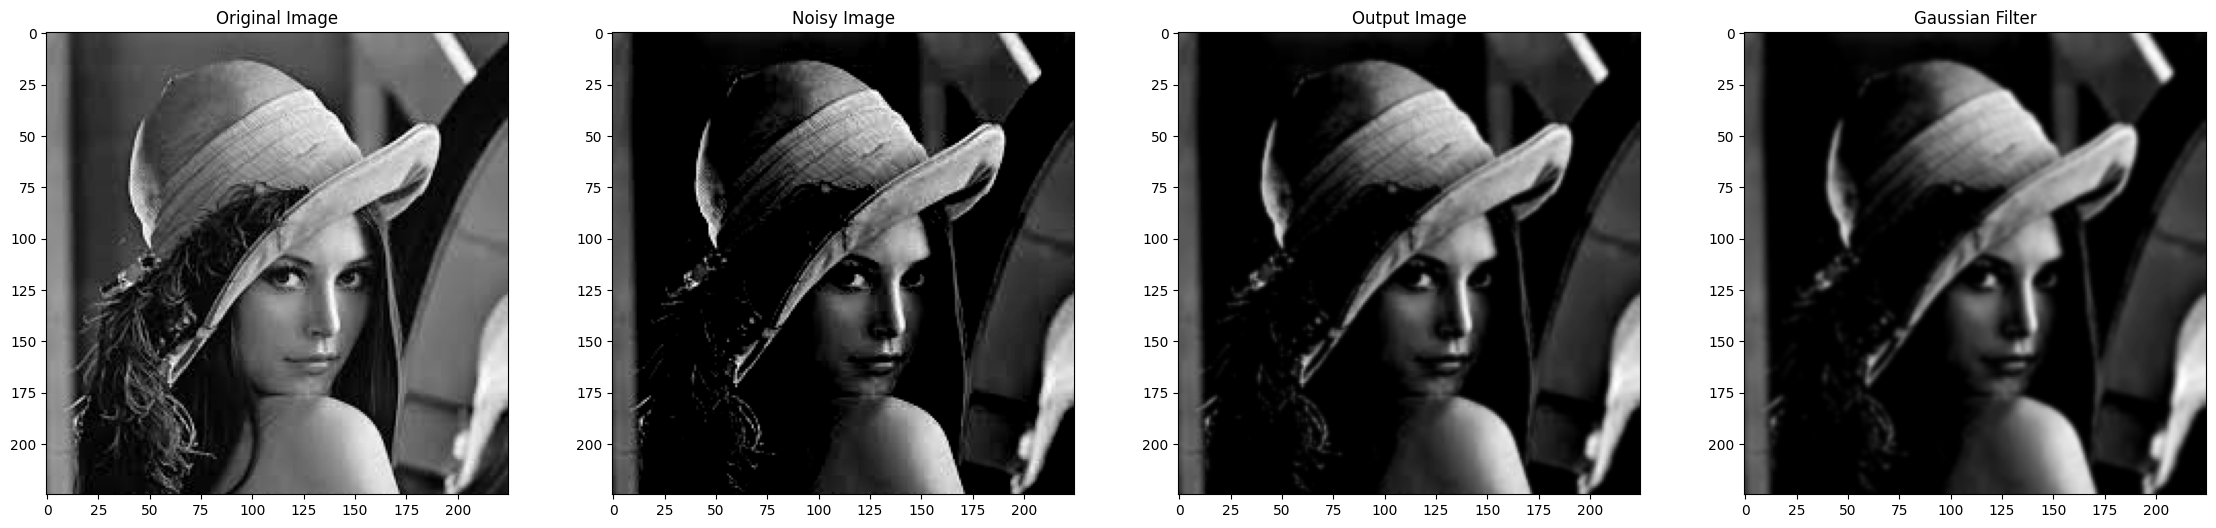

In [171]:
# Normalize the images
@njit
def normalize(img):
    m = np.mean(img)
    s = np.std(img)
    return (img - m) / s

nimg = normalize(noisy_img)
oimg = normalize(original_img)

# Apply anisotropic diffusion
fimg = anisodiff(nimg, niter=4, kappa=100, gamma=0.08, step=(1.,1.), sigma=1, option=1)

# Plot the results
plt.figure(figsize=(26,18))
plt.subplot(3,3,1)
plt.imshow(oimg, cmap='gray')
plt.title('Original Image')
plt.subplot(3,3,2)
plt.imshow(nimg, cmap='gray')
plt.title('Noisy Image')
plt.subplot(3,3,3)
plt.imshow(fimg, cmap='gray', vmin=-1, vmax=1)
plt.title('Filtered by Anisotropic Diffusion')
plt.subplot(3,3,4)
plt.imshow(fimg - oimg, cmap='gray')
plt.title('Difference between Diffused and original')
plt.subplot(3,3,5)
h = np.histogram(nimg, 100)
plt.plot(h[0])
plt.title('Histogram of Noisy Image')
plt.subplot(3,3,6)
h, ax = np.histogram(fimg, 100)
plt.plot(ax[:-1], h)
plt.title('Histogram of Diffused Image')
plt.show()

# Apply Gaussian filter for comparison
gimg = sp.ndimage.gaussian_filter(nimg, 1)

# Plot the results
plt.figure(figsize=(26,18))
plt.subplot(3,3,1)
plt.imshow(nimg, cmap='gray')
plt.title('Noisy')
plt.subplot(3,3,2)
plt.imshow(gimg, cmap='gray', vmin=-0.8, vmax=0.8)
plt.title('Gauss Filtered')
plt.subplot(3,3,3)
plt.imshow(gimg - oimg, cmap='gray')
plt.title('Difference Gaussian Filter and original')
plt.subplot(3,3,4)
h = np.histogram(nimg, 100)
plt.plot(h[0])
plt.title('Histogram of Noisy Image')
plt.subplot(3,3,5)
h, ax = np.histogram(gimg, 100)
plt.plot(ax[:-1], h)
plt.title('Gauss Filtered Histogram')
plt.subplot(3,3,6)
plt.imshow(fimg - gimg, cmap='gray')
plt.title('Difference between Anisotropic Diffusion and Gaussian Filter')
plt.show()

# Plot the output image after diffusion
plt.figure(figsize=(28,6))
plt.subplot(1,4,1)
plt.imshow(original_img, cmap='gray')
plt.title('Original Image')
plt.subplot(1,4,2)
plt.imshow(nimg, cmap='gray')
plt.title('Noisy Image')
plt.subplot(1,4,3)
plt.imshow(fimg, cmap='gray')
plt.title('Output Image')
plt.subplot(1,4,4)
plt.imshow(gimg, cmap='gray')
plt.title("Gaussian Filter")
plt.show()

## Metric on image processing :
### Peak Signal to noise ration (PSNR)
It is a measure of the peak error, it is defined as
$$\text{PSNR}=10\log_{10}\left(\frac{\max_{\text{pixel}}}{MSE}\right)$$
where $\max_\text{pixel}$ is the maximum pixel value of the image and $MSE$ is the mean squared error. The higher the PSNR, the higher is the quality of the extracted image.
### Structural Similarity Index (SSIM)
SSIM is a perceptual metric that quantifies image quality degradation caused by processing, such as data compression or by losses in data transmission. It is defined as:
$$\text{SSIM}(x,y)=\frac{(2μ_xμ_y+C_1)(2σ_{xy}+C_2)}{(μ_x^2+μ_y^2+C_1)(\sigma_x^2+σ_y^2+C_2)}$$
where $μ_x$ and $μ_y$ are the averages of $x$ and $y,σ_x^2$ and $σ_y^2$ are the variances of $x$ and $y, σ_{xy}$ is the covariance of $x$ and $y$, and $C_1=(0.01L)^2,C_2=(k_2L)^2$ are constants to stabilize the division with weak denominator, and $L$ is the dynamic range of the pixel-values (we can take $L$ such that $\log_{2}(L+1)=\text{#bits per pixel}$
### Mean squared error (MSE)
$$MSE=\frac{1}{N}\sum_{i=1}^N(x_i-y_i)^2$$
where $N$ is the number of pixels, $x_i$ is the pixel value in the original image and $y_i$ is for the filtered image.
### Edge preservation
The value of GMSD reflects the range of distortion in an image. If $r$ is the reference image and $d$ is the distorted image, then the gradient magnitudes $m_r(i)$ of $r$ and $m_d(i)$ of $d$ at location $i$ is defined as:
$$\begin{cases}m_r(i)=\sqrt{(r*h_x)^2(i)+(r*h_y)^2(i)} \\m_d(i)=\sqrt{(d*h_x)^2(i)+(d*h_y)^2(i)} \end{cases}$$
Where $*$ is a convolution, $h_x,h_y$ are respectively the prewitt filter along horizontal $x$ and vertical $y$:
$$h_x=\left(\begin{matrix}\frac{1}{3}&0&-\frac{1}{3} \\\frac{1}{3}&0&-\frac{1}{3}\\\frac{1}{3}&0&-\frac{1}{3} \end{matrix} \right) \; , \; h_y=h_x^T$$
The Gradient magnitude similarity (GMS) is computed as:
$$GMS(i)=\frac{2m_r(i)m_d(i)+c}{m_r^2(i)+m_d^2(i)+c}$$
where $c$ is positive constant that supplu numerical stability for a small denominator.  
The GMS map serves as the local quality map (LQM) of the distorted image $d$ with maximal value $1$ if the image are the same, i.e. no distortion in the process.  
Since the above is local, to find the global distortion, we consider the average, and hence the gradient magnitude similarity deviation (GMSD):
$$GMSD=\sqrt{\frac{1}{N}\sum_{i=1}^N\left(GMS(i)-GMSM\right)^2}$$
where the  Gradient Magnitude Similarity Mean (GMSM) is $$\frac{1}{N}\sum_{i=1}^NGMS(i)$$
- PSNR: Higher values are better.
- SSIM: Values closer to 1 are better. Indicating structural similarity.
- MSE: Lower values are better. Indicating more error.
- GMSD: Lower values are better. indicating gradient similarity.

In [172]:
import numpy as np
import skimage.metrics as metrics
from scipy.ndimage import convolve
import cv2
import matplotlib.pyplot as plt
# Assuming nimg is the original image and fimg is the filtered image

# 1. Peak Signal-to-Noise Ratio (PSNR)

def psnr(original, filtered):
    max_pixel = np.max(original)
    mse_value = np.mean((original - filtered) ** 2)
    psnr_value = 10 * np.log10(max_pixel / mse_value)
    return psnr_value
print("between noisy image and output image")
psnr_value = psnr(nimg, fimg)
print(f"PSNR: {psnr_value}")

# 2. Structural Similarity Index (SSIM)
def ssim(original,filtered):
    return metrics.structural_similarity(original, filtered, data_range=filtered.max() - filtered.min())
ssim_value = metrics.structural_similarity(nimg, fimg, data_range=nimg.max() - nimg.min())
print(f"SSIM: {ssim_value}")

# 3. Mean Squared Error (MSE)
def mse(original,filtered):
    return np.mean((original-filtered)**2)
mse_value = np.mean((nimg - fimg) ** 2)
print(f"MSE: {mse_value}")

# 4. Edge Preservation Metric (GMSD)

def gradient_magnitude(image):
    h_x = np.array([[1/3, 0, -1/3], [1/3, 0, -1/3], [1/3, 0, -1/3]])
    h_y = h_x.T
    grad_x = convolve(image, h_x)
    grad_y = convolve(image, h_y)
    return np.sqrt(grad_x**2 + grad_y**2)

def gmsd(original, filtered):
    m_r = gradient_magnitude(original)
    m_d = gradient_magnitude(filtered)
    c = 0.0026  # Constant for numerical stability
    gms = (2 * m_r * m_d + c) / (m_r**2 + m_d**2 + c)
    gmsm = np.mean(gms)
    gmsd_value = np.sqrt(np.mean((gms - gmsm) ** 2))
    return gmsd_value

gmsd_value = gmsd(nimg, fimg)
print(f"GMSD : {gmsd_value}",end="\n \n")

print("between noisy image and original image")
psnr_value = psnr(nimg, oimg)
print(f"PSNR: {psnr_value}")
ssim_value = metrics.structural_similarity(nimg, oimg, data_range=oimg.max() - oimg.min())
print(f"SSIM: {ssim_value}")
gmsd_value = gmsd(nimg, oimg)
mse_value = np.mean((oimg - nimg) ** 2)
print(f"MSE: {mse_value}")
print(f"GMSD : {gmsd_value}",end="\n \n")

print("between output image and original image")
psnr_value = psnr(fimg, oimg)
print(f"PSNR: {psnr_value}")
ssim_value = metrics.structural_similarity(fimg, oimg, data_range=oimg.max() - oimg.min())
print(f"SSIM: {ssim_value}")
mse_value = np.mean((oimg - fimg) ** 2)
print(f"MSE: {mse_value}")
gmsd_value = gmsd(fimg, oimg)
print(f"GMSD : {gmsd_value}",end="\n \n")


between noisy image and output image
PSNR: 22.97693050229768
SSIM: 0.9472864945773373
MSE: 0.0181852805480899
GMSD : 0.15597916665381417
 
between noisy image and original image
PSNR: 13.073764033242178
SSIM: 0.45870113966146814
MSE: 0.17784294943287277
GMSD : 0.36697770288852394
 
between output image and original image
PSNR: 12.856233589740729
SSIM: 0.4446419003708332
MSE: 0.17997509575878787
GMSD : 0.35132417323484777
 


In [164]:

n_values=np.linspace(1,100,100)
PSNR_values=[]
SSIM_values=[]
MSE_values=[]
GMSD_values=[]
for n in n_values:
    PSNR_values.append(psnr(oimg,anisodiff(nimg, n, kappa=100, gamma=0.08, step=(1.,1.), sigma=1, option=1)))
    SSIM_values.append(ssim(oimg,anisodiff(nimg, n, kappa=100, gamma=0.08, step=(1.,1.), sigma=1, option=1)))
    MSE_values.append(mse(oimg,anisodiff(nimg, n, kappa=100, gamma=0.08, step=(1.,1.), sigma=1, option=1)))
    GMSD_values.append(gmsd(oimg,anisodiff(nimg, n, kappa=100, gamma=0.08, step=(1.,1.), sigma=1, option=1)))

between noisy image and output image
PSNR: 18.787593085406332
SSIM: 0.8584939538275567
MSE: 0.04771487023739671
GMSD : 0.22919113819799664
 
between noisy image and original image
PSNR: 13.073764033242178
SSIM: 0.45870113966146814
MSE: 0.17784294943287277
GMSD : 0.36697770288852394
 
between output image and original image
PSNR: 12.31643854993129
SSIM: 0.4101303421079824
MSE: 0.19719277050323944
GMSD : 0.3367317739838441
 


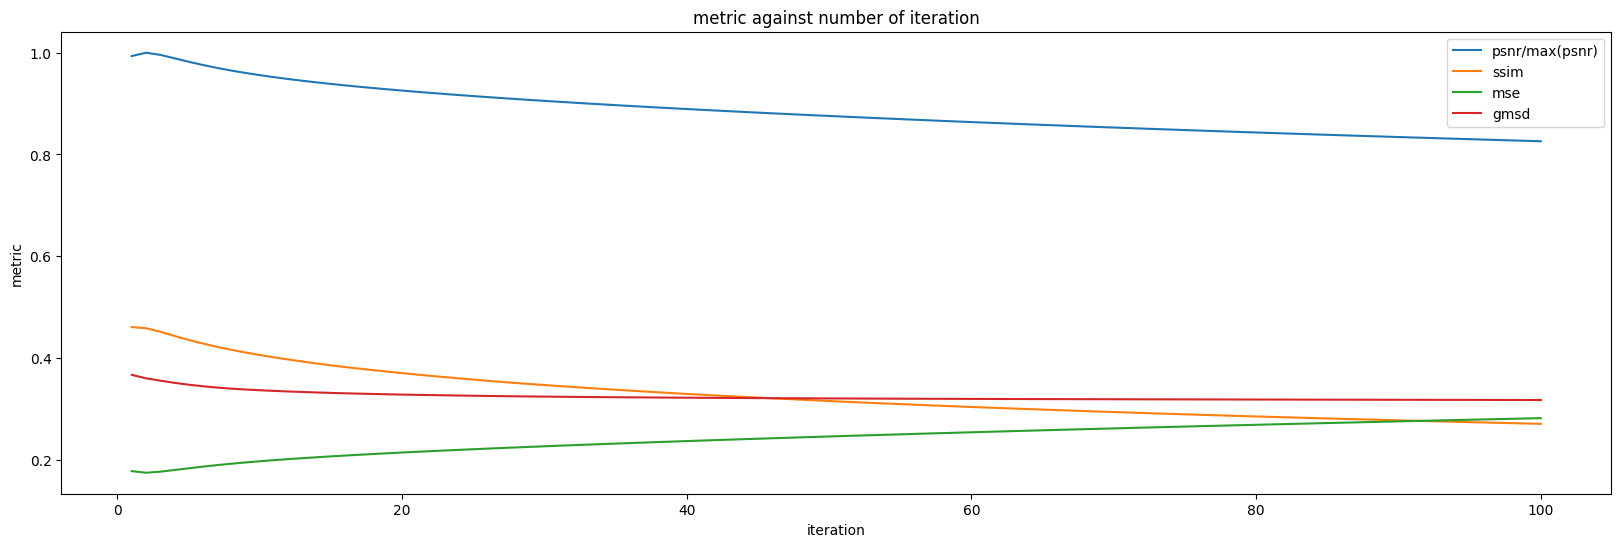

In [169]:


plt.figure(figsize=(20,6))
plt.plot(n_values,PSNR_values/max(PSNR_values),label="psnr/max(psnr)")
plt.plot(n_values,SSIM_values,label="ssim")
plt.plot(n_values,MSE_values,label="mse")
plt.plot(n_values,GMSD_values,label="gmsd")
plt.title("metric against number of iteration")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("metric")
plt.show()

